## Final Project Submission - Exploratory Data Analysis

Please fill out:
* Student name: Andrew Levinton
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Ahbineet Kulkarni
* Blog post URL:


## Statsmodels debug
- This is because statsmodels was having version issues. this is a workaround
- The code below re-publishes the existing (but private) _centered function as a public attribute to the module already imported in RAM.

In [1214]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

## Import necessary libraries

In [1215]:
# raw data handling
import pandas as pd
import numpy as np
import datetime as dt

# data visualiztion
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


plt.style.use('fivethirtyeight')

# regression modeling
import statsmodels.api as sm
from statsmodels.formula.api import ols

# model validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings # weird sns.distplot() warnings
warnings.filterwarnings("ignore")



plt.style.use('fivethirtyeight')

## Define Functions

In [1216]:
# Grabbing and categorizing vifs

def get_VIFs(vif_data, df):
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = df_numerical.columns
  
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(df_numerical.values, i)
                              for i in range(len(df_numerical.columns))]


    vif_data['VIF_values'] = vif_data["feature"].astype(str) + ': ' + vif_data["VIF"].round(2).astype(str)
    vif_data['VIF'] = vif_data['VIF'].astype(float)

    vif_data['sliced_vifs'] = vif_data['VIF'].apply(lambda x: 'good_VIF' if float(x) <=5\
                                             else 'questionable_VIF' if float(x) <=10\
                                             else 'bad_VIF' if float(x) > 10\
                                             else x)
    
    return vif_data.sort_values('sliced_vifs')

# get ols model and plot residual distribution
def get_OLS_model(name, X, y):
    model = sm.OLS(y, sm.add_constant(X))
    results = model.fit()
    model_residual = results.resid
    
    return print(results.summary()), plt.suptitle(f'Residual distribution for {name} model'), sns.distplot(model_residual), plt.show()

## Read in dataset, check length

In [1217]:
df = pd.read_csv('kc_house_data.csv')
len(df)

30155

### Checking dtypes

In [1218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

## Linear Model must meet the following assumptions:

### Simple Linear Regression on select features
Assumption check:
- Is it linear?
- Is it normal?
    - histogram
    - QQ-plot
- Is it homoscedastic?

## The process for building this linear model:
- Prep data for linear model regression: This involves dropping null values, dropping "bad data", as well as engineering features to assist in assuming linearization
- Key scores to look at:
- `R-Squared ( or the coefficient of determination)` - a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).
- `Correlation coefficients` - check to see what variables seem relatable to the target variable (price)
- `residual plots` - check how far data compares to the mean. Data should be normally distributed to avoid skewness of the mean
- `variance inflation factor` - level of statistical skew
- `Root mean squared erro`r - how far predictions fall from measured true values using Euclidean distance.
- `pvalues of independent variables` - measures how statistically significant the independent variables are

## Data Preparation

## Dropping nullls

In [1219]:
df.dropna(inplace=True)

### Recheck length

In [1220]:
len(df)

30111

### Looking at Washington state

In [1221]:
df['address'] = df['address'].str.lower()

In [1222]:
df = df[df['address'].str.contains('washington')]

In [1223]:
len(df)

29208

In [1224]:
df['zipcode'] = df['address'].apply(lambda x: x.split(',')[2].split(' ')[-1])

In [1225]:
df['zipcode'].unique()

array(['98055', '98133', '98178', '98118', '98027', '98166', '98030',
       '98023', '98019', '98144', '98031', '98092', '98103', '98006',
       '98136', '98007', '98038', '98057', '98077', '98126', '98053',
       '98039', '98107', '98008', '98155', '98168', '98199', '98004',
       '98045', '98052', '98011', '98002', '98033', '98116', '98198',
       '98125', '98001', '98112', '98034', '98056', '98059', '98005',
       '98040', '98014', '98106', '98029', '98122', '98003', '98117',
       '98042', '98119', '98065', '98022', '98072', '98058', '98108',
       '98115', '98074', '98105', '98024', '98146', '98109', '98102',
       '98028', '98188', '98177', '98075', '98010', '98148', '98047',
       '98032', '98070', '98051', '98288', '98354', '98272', '98296',
       '98271', '98050', '63090', 'seattle', '98387', '15301', '98251',
       '98223', '98338', '98224', '98372', '98663', '99202', '99403',
       '98422', '99203', '99223', '98270'], dtype=object)

In [1226]:
df = df[df['zipcode'].str.startswith('98') | df['zipcode'].str.contains('seattle')]

In [1227]:
len(df)

29200

In [1228]:
df['zipcode'] = df['zipcode'].apply(lambda x: '98101' if x=='seattle' else x)

In [1229]:
df['zipcode'].unique()

array(['98055', '98133', '98178', '98118', '98027', '98166', '98030',
       '98023', '98019', '98144', '98031', '98092', '98103', '98006',
       '98136', '98007', '98038', '98057', '98077', '98126', '98053',
       '98039', '98107', '98008', '98155', '98168', '98199', '98004',
       '98045', '98052', '98011', '98002', '98033', '98116', '98198',
       '98125', '98001', '98112', '98034', '98056', '98059', '98005',
       '98040', '98014', '98106', '98029', '98122', '98003', '98117',
       '98042', '98119', '98065', '98022', '98072', '98058', '98108',
       '98115', '98074', '98105', '98024', '98146', '98109', '98102',
       '98028', '98188', '98177', '98075', '98010', '98148', '98047',
       '98032', '98070', '98051', '98288', '98354', '98272', '98296',
       '98271', '98050', '98101', '98387', '98251', '98223', '98338',
       '98224', '98372', '98663', '98422', '98270'], dtype=object)

In [1230]:
len(df['zipcode'].unique())

89

In [1231]:
df['zipcode'] = df['zipcode'].astype(int)

## Observing correlation matrix for possible features that can be used with the price

In [1232]:
df.corr()['price'].abs().sort_values(ascending=False)

price            1.000000
sqft_living      0.616741
sqft_above       0.546108
bathrooms        0.488039
sqft_patio       0.317623
lat              0.296212
bedrooms         0.290994
sqft_garage      0.267477
sqft_basement    0.246548
floors           0.199285
yr_built         0.105877
zipcode          0.105280
sqft_lot         0.086790
yr_renovated     0.085506
long             0.081940
id               0.030237
Name: price, dtype: float64

### Observations
- At first glance, it appears that sqft_living, sqft_above and bathrooms are the strongest correlated features to the price. 
- Further investigation is needed to measure the validity of the variables. They may be correlated with the price due to skewness or other factors that can make the correlation a deceptively "good" feature.

In [1233]:
#extracting grade as an integer

df['grade'] = df['grade'].apply(lambda x: int(str(x.split(' ')[0])))


# #changing year to a a string
# df['yr_renovated'] = df['yr_renovated'].astype(str)

# df['yr_built'] = df['yr_built'].astype(str)

#changing date to datetime object, get day and month

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day_of_year'] = df['date'].dt.dayofyear

In [1234]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
greenbelt                object
nuisance                 object
view                     object
condition                object
grade                     int64
heat_source              object
sewer_system             object
sqft_above                int64
sqft_basement             int64
sqft_garage               int64
sqft_patio                int64
yr_built                  int64
yr_renovated              int64
address                  object
lat                     float64
long                    float64
zipcode                   int32
month                     int64
day_of_year               int64
dtype: object

In [1235]:
df['grade'].value_counts()

7     11553
8      8863
9      3597
6      2848
10     1350
11      402
5       385
12      122
4        46
13       24
3         9
2         1
Name: grade, dtype: int64

In [1236]:
df.yr_renovated.value_counts()

0       27832
2021       69
2006       49
2018       44
1990       42
        ...  
1942        1
1951        1
1948        1
1972        1
1924        1
Name: yr_renovated, Length: 82, dtype: int64

In [1237]:
df.yr_built.value_counts()

2021    1358
1968     514
1978     493
1977     484
1967     474
        ... 
1901      39
1934      38
1935      38
1902      36
1933      30
Name: yr_built, Length: 123, dtype: int64

### The yr_renovated is "zero inflated" - 0 meaning there have been no renovations

In [1238]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
greenbelt                object
nuisance                 object
view                     object
condition                object
grade                     int64
heat_source              object
sewer_system             object
sqft_above                int64
sqft_basement             int64
sqft_garage               int64
sqft_patio                int64
yr_built                  int64
yr_renovated              int64
address                  object
lat                     float64
long                    float64
zipcode                   int32
month                     int64
day_of_year               int64
dtype: object

### Extracting Numerical Predictors

In [1239]:
df.dtypes.unique()

array([dtype('int64'), dtype('<M8[ns]'), dtype('float64'), dtype('O'),
       dtype('int32')], dtype=object)

In [1240]:
numerical_types = ['int64','float64']
numerical_predictors = list(df.select_dtypes(include=numerical_types))
numerical_predictors

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'month',
 'day_of_year']

In [1241]:
df_numerical = df[numerical_predictors]

In [1242]:
df_numerical.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'grade', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'yr_built', 'yr_renovated', 'lat', 'long', 'month',
       'day_of_year'],
      dtype='object')

In [1243]:
df_numerical = df_numerical.drop(['id','price'],axis=1)
# df_numerical = df_numerical.drop(['id','price'],axis=1)


In [1244]:
df_numerical['floors'] = df['floors'].astype(float)

### Calculating variance inflation factor [VIF]

#### VIF levels:

- Good: VIF <= 5

- Moderate/Questionable: VIF >=5 and VIF <= 10

- Throw out: VIF >= 10


In [1245]:
get_VIFs(vif_data,df_numerical)

,feature,VIF,VIF_values,sliced_vifs
0,bedrooms,24.711552,bedrooms: 24.71,bad_VIF
1,bathrooms,25.945552,bathrooms: 25.95,bad_VIF
2,sqft_living,117.708029,sqft_living: 117.71,bad_VIF
4,floors,17.008777,floors: 17.01,bad_VIF
5,grade,131.928893,grade: 131.93,bad_VIF
6,sqft_above,90.217558,sqft_above: 90.22,bad_VIF
10,yr_built,8457.754643,yr_built: 8457.75,bad_VIF
12,lat,109887.770753,lat: 109887.77,bad_VIF
13,long,120765.559040,long: 120765.56,bad_VIF
14,month,696.769288,month: 696.77,bad_VIF


It appears at first glance that the data only yields a small set of independent variables that are not highly collinear with eachother. This will be looked at again after the removal of outliers, and the transformation of data. 

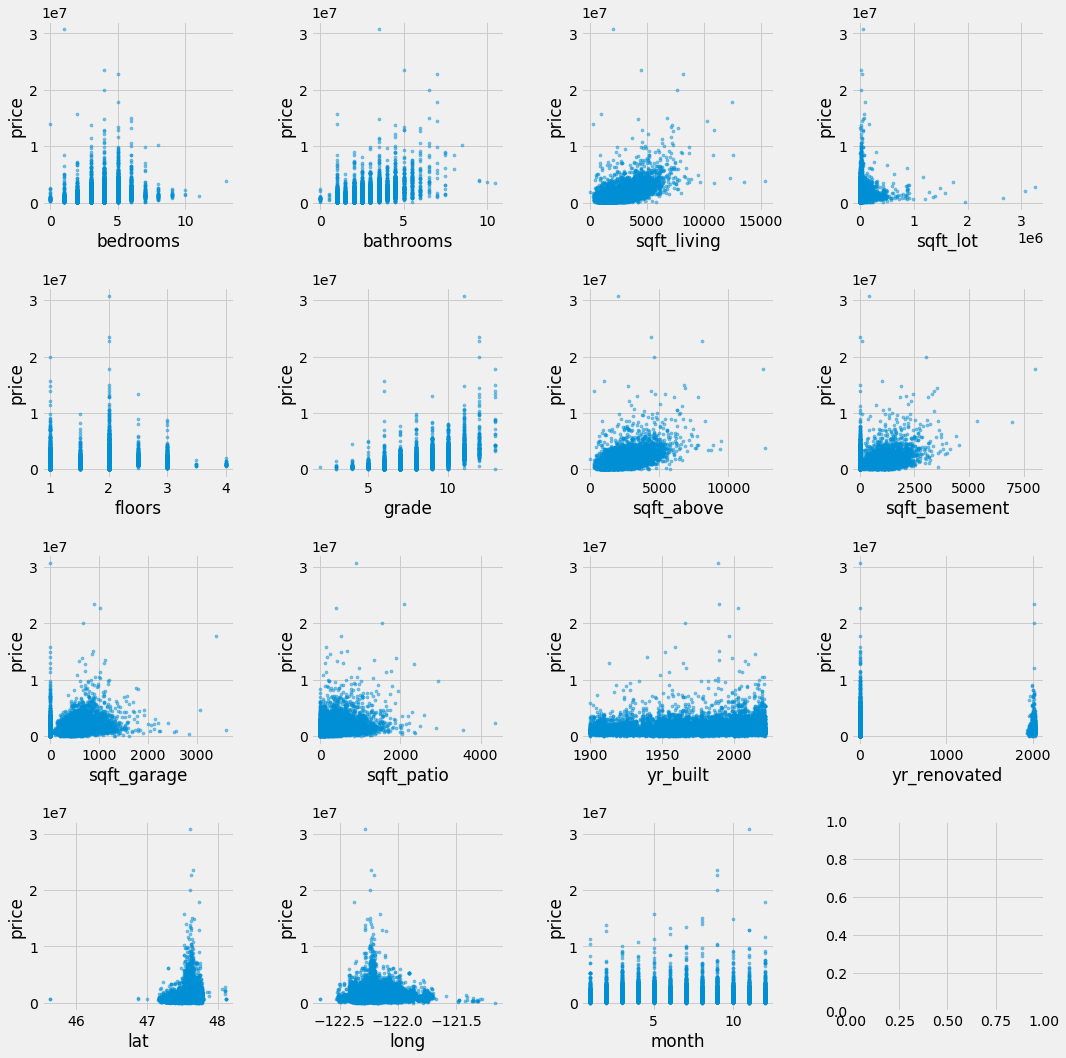

In [1246]:
# Specify the dependent variable and independent variables
y_col = 'price'
x_cols = [col for col in df_numerical.columns if col != y_col][:15]  # Use the first 15 independent variables

# Create scatter plot matrix
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i, x_var in enumerate(x_cols):
    row, col = divmod(i, 4)
    axs[row, col].scatter(df_numerical[x_var], df[y_col], alpha=0.5, s=10)
    axs[row, col].set_xlabel(x_var)
    axs[row, col].set_ylabel(y_col)

# Adjust plot layout
fig.subplots_adjust(top=0.93, hspace=0.4, wspace=0.4)

# Show the plot
plt.show()

### Extracting Categorical String Predictors

In [1247]:
categorical_types = ['O']
categorical_predictors = list(df.select_dtypes(include=categorical_types))
categorical_predictors

['waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'heat_source',
 'sewer_system',
 'address']

In [1248]:
df_categorical = df[categorical_predictors]

In [1249]:
df_categorical

,waterfront,greenbelt,nuisance,view,condition,heat_source,sewer_system,address
0,NO,NO,NO,NONE,Good,Gas,PUBLIC,"2102 southeast 21st court, renton, washington ..."
1,NO,NO,YES,AVERAGE,Average,Oil,PUBLIC,"11231 greenwood avenue north, seattle, washing..."
2,NO,NO,NO,AVERAGE,Average,Gas,PUBLIC,"8504 south 113th street, seattle, washington 9..."
3,NO,NO,NO,AVERAGE,Average,Gas,PUBLIC,"4079 letitia avenue south, seattle, washington..."
4,NO,NO,YES,NONE,Average,Electricity,PUBLIC,"2193 northwest talus drive, issaquah, washingt..."
...,...,...,...,...,...,...,...,...
30150,NO,NO,NO,NONE,Good,Oil,PUBLIC,"4673 eastern avenue north, seattle, washington..."
30151,NO,NO,NO,FAIR,Average,Gas,PUBLIC,"4131 44th avenue southwest, seattle, washingto..."
30152,NO,NO,YES,NONE,Average,Gas,PUBLIC,"910 martin luther king jr way, seattle, washin..."
30153,NO,NO,NO,NONE,Average,Gas,PUBLIC,"17127 114th avenue southeast, renton, washingt..."


### One Hot Encoding Numerical Categorical Data

In [1250]:
# df['floors'] = df['floors'].astype(str)
# floor_dummies = pd.get_dummies(df['floors'],prefix='floors',drop_first=True)

df['condition'] = df['condition'].astype(str)
cond_dummies =  pd.get_dummies(df['condition'],prefix='cond',drop_first=True)

# df['grade'] = df['grade'].astype(str)
# grade_dummies = pd.get_dummies(df['grade'],prefix='grade',drop_first=True)


In [1251]:
df['floors'].shape

(29200,)

# Model #1

In [1252]:
model_data = pd.concat([df_numerical,cond_dummies], axis = 1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     1544.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:30:19   Log-Likelihood:            -4.3108e+05
No. Observations:               29200   AIC:                         8.622e+05
Df Residuals:                   29179   BIC:                         8.624e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.213e+07   4.01e+06    -15.

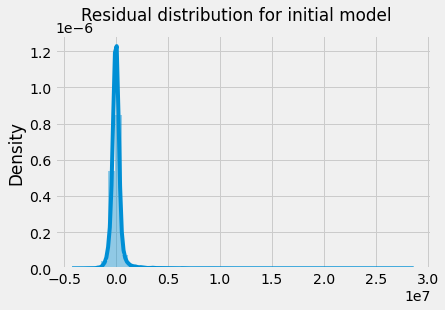

(None,
 Text(0.5, 0.98, 'Residual distribution for initial model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [1253]:
get_OLS_model('initial',X = model_data, y = df['price'])

# Observations

p_value > 0.05

- `longitude`**
- `month`
- `cond_Fair`
- `cond_poor` questionable


- With half the condition data(`cond_Fair`, `cond_Poor`) being insignificant in the model, it makes sense to drop the condition data completely. 
 - month was not anticipated as an effective predictor because it is not typical for the season to affect the sale price of a house
 
 Additional Observations:
 - The adjusted r-squared value is .514, indicating that his model can explain approximately 51.4% of the data.
 -  Skew: A kurtosis value between -2 and +2 is good to prove normalcy. The skew score is 10.065, indicating that this model is heavily skewed. This will be addressed through transformations to normalize the data. 

## Possible Improvements to be made to model:
    - dropping of variables that are not statistically significant (Pval > 0.05)
    - addition of categorial variables(one hot encoded)
    - location would possibly be the most interesting variable, mapped against the waterfront or view variable
    - transformation of data to satisfy normality assumption -ex: log transformation or square root transformation
    - removal of outliers: Outliers in this case will be considered to be any data falling greater than 
      3 standard deviations outside the mean
### Goals
    - improve skewness
    - reduce homoscedacity
    - increase rsquared to promote higher level explanation of data from model

#### Dropping the month due to high VIF and p_val

In [1254]:
df_numerical = df_numerical.drop('month', axis=1)

# Categorical data Exploratory Analysis and Engineering

The goal of this section will be to add in meaningful categorical data to the model, to be OneHotEncoded once prepped. For this, we first look at the categorical data. 

In [1255]:
df_categorical.columns

Index(['waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'heat_source', 'sewer_system', 'address'],
      dtype='object')

## Possible categorical variables of interest: 

* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `address` - The street address

The grade and condition are already onehotencoded in the model and could be changed to a numerical variable, so this part of the analysis will focus on the string categorical variables. 

The address appears to be the most interesting variable in the batch because it can be mapped against the waterfronts or the quality of view from the houses. For this, we will extrapolate features of the address to reduce and categorize the location. 

In [1256]:
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [1257]:
# convert waterfront into numeric boolean
waterfront_bool_dict = {'YES':1,'NO':0,np.nan:0}
df_categorical.waterfront.replace(to_replace=waterfront_bool_dict,inplace=True)

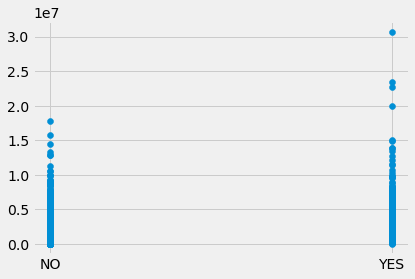

In [1258]:
plt.scatter(x=df['waterfront'], y=df['price'])

In [1259]:
df['nuisance'].unique()

array(['NO', 'YES'], dtype=object)

In [1260]:
# convert nuisance into numeric boolean
nuisance_bool_dict = {'YES':1,'NO':0,np.nan:0}
df_categorical.nuisance.replace(to_replace=nuisance_bool_dict,inplace=True)

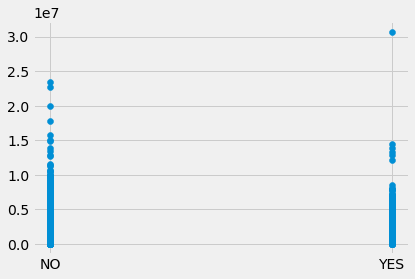

In [1261]:
plt.scatter(x=df['nuisance'], y=df['price'])

In [1262]:
# convert nuisance into numeric boolean
greenbelt_bool_dict = {'YES':1,'NO':0,np.nan:0}
df_categorical.greenbelt.replace(to_replace=greenbelt_bool_dict,inplace=True)

In [1263]:
df['view'].unique()

array(['NONE', 'AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD'], dtype=object)

In [1264]:
# convert view from string into categorical ordinal
view_dict = {'NONE':0,'FAIR':1,'AVERAGE':2,'GOOD':3,'EXCELLENT':4}
df_categorical.view.replace(to_replace=view_dict,inplace=True)

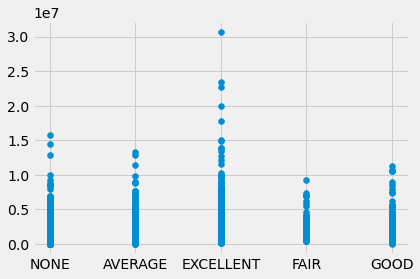

In [1265]:
plt.scatter(x=df['view'], y=df['price'])

In [1266]:
df['heat_source'].unique()

array(['Gas', 'Oil', 'Electricity', 'Gas/Solar', 'Electricity/Solar',
       'Other', 'Oil/Solar'], dtype=object)

In [1267]:
heat_source_dummies = pd.get_dummies(df['heat_source'], prefix='heat_source',drop_first=True)
heat_source_dummies

,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other
0,0,1,0,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
30150,0,0,0,1,0,0
30151,0,1,0,0,0,0
30152,0,1,0,0,0,0
30153,0,1,0,0,0,0


In [1268]:
df['sewer_system'].unique()

array(['PUBLIC', 'PRIVATE', 'PRIVATE RESTRICTED', 'PUBLIC RESTRICTED'],
      dtype=object)

In [1269]:
sewer_dummies = pd.get_dummies(df['sewer_system'],prefix='sewer', drop_first=True)
sewer_dummies

,sewer_PRIVATE RESTRICTED,sewer_PUBLIC,sewer_PUBLIC RESTRICTED
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
30150,0,1,0
30151,0,1,0
30152,0,1,0
30153,0,1,0


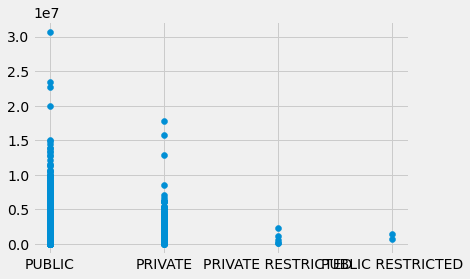

In [1270]:
plt.scatter(x=df['sewer_system'], y=df['price'])

### Developing categorical dataframe

In [1271]:
df_cat_pick = df_categorical[['waterfront','nuisance','view','greenbelt']]

## Model #2

In [1272]:
model_2_data = pd.concat([df_numerical,sewer_dummies,heat_source_dummies, df_cat_pick], axis = 1)

In [1273]:
model_2_data.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'lat', 'long', 'day_of_year',
       'sewer_PRIVATE RESTRICTED', 'sewer_PUBLIC', 'sewer_PUBLIC RESTRICTED',
       'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'waterfront', 'nuisance', 'view', 'greenbelt'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     1288.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:30:27   Log-Likelihood:            -4.2987e+05
No. Observations:               29200   AIC:                         8.598e+05
Df Residuals:                   29171   BIC:                         8.600e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

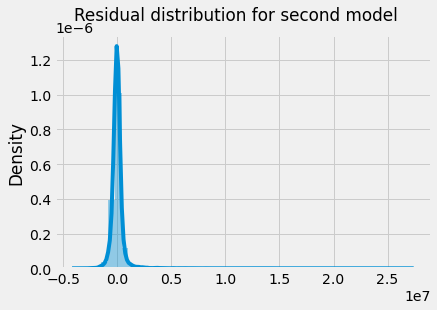

(None,
 Text(0.5, 0.98, 'Residual distribution for second model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [1274]:
get_OLS_model('second',model_2_data, df['price'])

`heat_source`, `greenbelt` and `sewer_system` both have incredibly high p-values. These will be dropped. 

#### Dropping greenbelt

In [1275]:
df_cat_pick = df_cat_pick.drop('greenbelt', axis=1)

#### Re-Defining Model_2_data. Dummies for heat_source and sewer_system are simply not added to the dataframe this time around

In [1276]:
model_2_data = pd.concat([df_numerical,df_cat_pick], axis = 1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     1976.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:30:29   Log-Likelihood:            -4.2999e+05
No. Observations:               29200   AIC:                         8.600e+05
Df Residuals:                   29181   BIC:                         8.602e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.564e+07   3.83e+06    -17.123

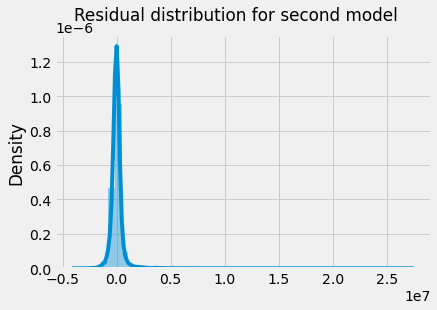

(None,
 Text(0.5, 0.98, 'Residual distribution for second model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [1277]:
get_OLS_model('second',model_2_data, df['price'])

### Droppping long and nuisance due to the pvalues > 0.05

In [1278]:
model_2_data = model_2_data.drop(['long','nuisance'], axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     2223.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:30:32   Log-Likelihood:            -4.2999e+05
No. Observations:               29200   AIC:                         8.600e+05
Df Residuals:                   29183   BIC:                         8.601e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.326e+07   1.32e+06    -47.972

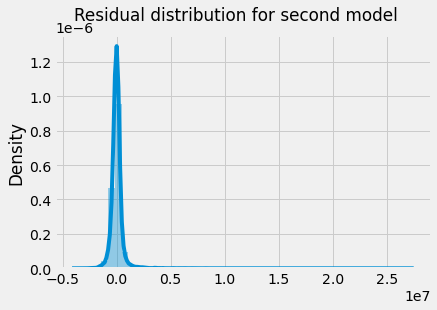

(None,
 Text(0.5, 0.98, 'Residual distribution for second model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [1279]:
get_OLS_model('second',model_2_data, df['price'])

## Observations of Model 2

Model is still highly skewed although did present itself with some improvements. Next steps will be to normalize the data by transforming features that are skewed within the data, as well as remove outliers

- Jarque-Bera score is sky high and must come down for the model to hold any validity. 
- Durbin Watson score is in the acceptable range of 1.50-2.50
- Rsquared has 'improved' but only at the expense of the the continued flaws mentioned before. 

## Eliminating Outliers

To normalize the distribution, outlier removal will be the first step. An outlier will be defined as three standard deviations away from the mean of the target variable.

In [1280]:
std_thresh = df['price'].std()*3 # value of the third central moment of the target variable
df_outlier_removed = df.loc[abs(df['price']) <= std_thresh] # slicing all data within the defined range

# assign X and y variables to the appropriate dataframes/series
y = df_outlier_removed['price']

In [1281]:
df_outlier_removed

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode,month,day_of_year
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,40,1969,0,"2102 southeast 21st court, renton, washington ...",47.461975,-122.19052,98055,5,144
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,0,240,1950,0,"11231 greenwood avenue north, seattle, washing...",47.711525,-122.35591,98133,12,347
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,0,1956,0,"8504 south 113th street, seattle, washington 9...",47.502045,-122.22520,98178,9,272
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,200,270,2010,0,"4079 letitia avenue south, seattle, washington...",47.566110,-122.29020,98118,12,348
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,30,2012,0,"2193 northwest talus drive, issaquah, washingt...",47.532470,-122.07188,98027,8,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,2021-11-30,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,0,210,1921,0,"4673 eastern avenue north, seattle, washington...",47.664740,-122.32940,98103,11,334
30151,194000695,2021-06-16,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,0,520,2011,0,"4131 44th avenue southwest, seattle, washingto...",47.565610,-122.38851,98116,6,167
30152,7960100080,2022-05-27,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,240,110,1995,0,"910 martin luther king jr way, seattle, washin...",47.610395,-122.29585,98122,5,147
30153,2781280080,2022-02-24,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,480,100,2006,0,"17127 114th avenue southeast, renton, washingt...",47.449490,-122.18908,98055,2,55


## New look at model with removed outliers

In [1282]:
outlier_data = pd.concat([y,model_2_data], axis=1)

outlier_data = outlier_data.dropna()

In [1283]:
outlier_data = outlier_data.drop('price', axis=1)

In [1284]:
len(outlier_data)

28004

In [1285]:
outlier_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,day_of_year,waterfront,view
0,4,1.0,1180,7140,1.0,7,1180,0,0,40,1969,0,47.461975,144,0,0
1,5,2.5,2770,6703,1.0,7,1570,1570,0,240,1950,0,47.711525,347,0,2
2,6,2.0,2880,6156,1.0,7,1580,1580,0,0,1956,0,47.502045,272,0,2
3,3,3.0,2160,1400,2.0,9,1090,1070,200,270,2010,0,47.566110,348,0,2
4,2,2.0,1120,758,2.0,7,1120,550,550,30,2012,0,47.532470,236,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,5,2.0,1910,4000,1.5,8,1600,1130,0,210,1921,0,47.664740,334,0,0
30151,3,2.0,2020,5800,2.0,7,2020,0,0,520,2011,0,47.565610,167,0,1
30152,3,2.0,1620,3600,1.0,7,940,920,240,110,1995,0,47.610395,147,0,0
30153,3,2.5,2570,2889,2.0,8,1830,740,480,100,2006,0,47.449490,55,0,0


## Model #3

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     2708.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:30:37   Log-Likelihood:            -3.9400e+05
No. Observations:               28004   AIC:                         7.880e+05
Df Residuals:                   27987   BIC:                         7.882e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.668e+07   6.94e+05    -81.618

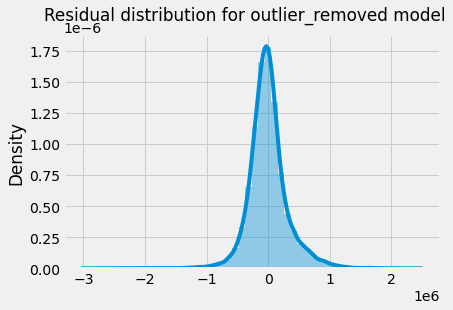

(None,
 Text(0.5, 0.98, 'Residual distribution for outlier_removed model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [1286]:
get_OLS_model('outlier_removed', outlier_data,y)

## Observations of model 3

- `yr_renovated` - questionable pvalue to leave in given its super high variance inflation factor. 



- Adjusted rsquared indicates that the model explains 60.8% of the data.
- Skewness has improved dramatically to an acceptable range between -2 and 2. The removal of outliers has made this possible.
- Durbin-Watson score is still in the acceptable ranges of 1.5-2.5
- Jarque-Bera score is still very high but has been brought down by a significant factor. Still not perfect but trending in the right direction.
- Multicollinearity is possibly present in the model and likely so given the initial VIFs before the first model was built. VIFS should be revisited again to see if those variables are worth keeping. 

## Looking at log transformations for the price.

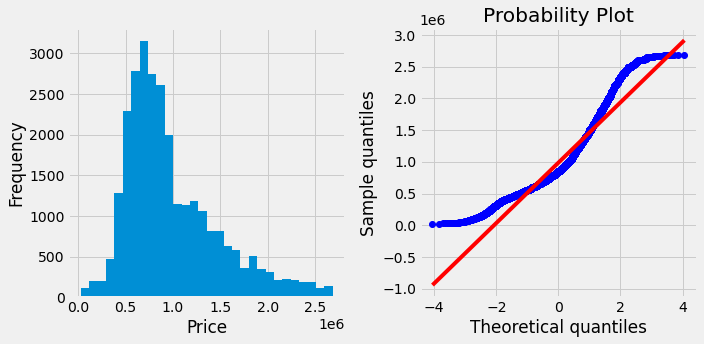

In [1287]:
import scipy.stats as stats
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram on the first subplot
axs[0].hist(y, bins=30)
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')

# Plot QQ-plot on the second subplot
stats.probplot(y, plot=axs[1])
axs[1].set_xlabel('Theoretical quantiles')
axs[1].set_ylabel('Sample quantiles')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

As shown by the histogram of the price, we have a distribution that is heavily skewed right. The QQplot shows that the price follows an exponential pattern.

## Using log transformation to normally distribute the price data

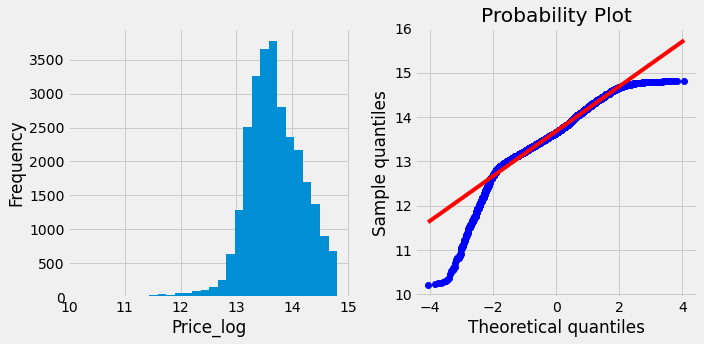

In [1288]:
import matplotlib.pyplot as plt
import scipy.stats as stats

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
y_log = np.log(y)
# Plot histogram on the first subplot
axs[0].hist(y_log, bins=30)
axs[0].set_xlabel('Price_log')
axs[0].set_ylabel('Frequency')

# Plot QQ-plot on the second subplot
stats.probplot(y_log, plot=axs[1])
axs[1].set_xlabel('Theoretical quantiles')
axs[1].set_ylabel('Sample quantiles')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### Issue above is the data shows linearization everywhere but both tails of the data. Catching the lower tail will be the goal for the next test of transformation. For this, we will try a root transformation. 

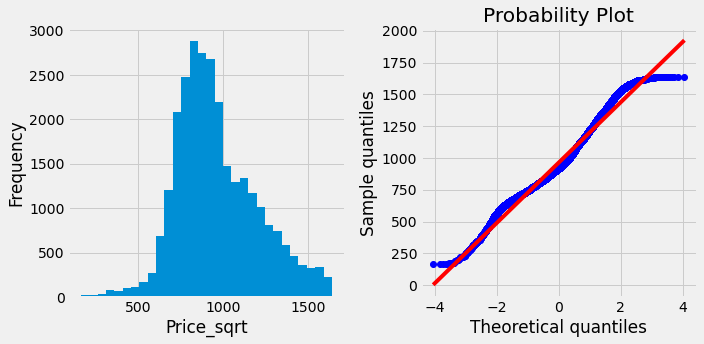

In [1289]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
y_sqrt = y**0.5
# Plot histogram on the first subplot
axs[0].hist(y_sqrt, bins=30)
axs[0].set_xlabel('Price_sqrt')
axs[0].set_ylabel('Frequency')

# Plot QQ-plot on the second subplot
stats.probplot(y_sqrt, plot=axs[1])
axs[1].set_xlabel('Theoretical quantiles')
axs[1].set_ylabel('Sample quantiles')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

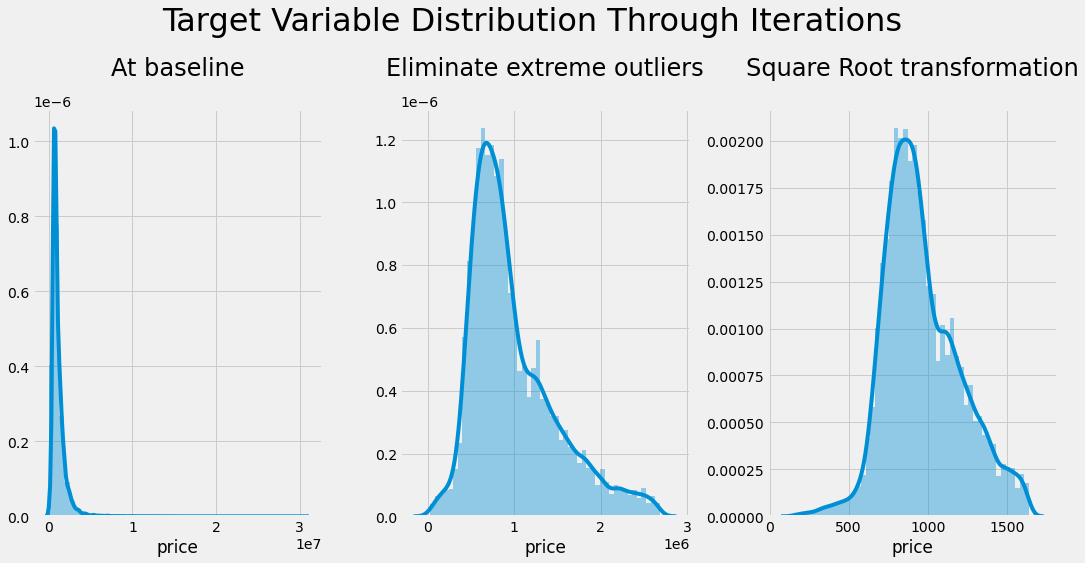

In [1290]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)

og = sns.distplot(df['price'],ax=ax1).set_title('At baseline\n',fontsize=24)
ot = sns.distplot(y,ax=ax2).set_title('Eliminate extreme outliers\n',fontsize=24)
lo = sns.distplot(y_sqrt,ax=ax3).set_title('Square Root transformation\n',fontsize=24)

ax1.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")


plt.gcf().set_size_inches(15, 8)
plt.suptitle("Target Variable Distribution Through Iterations",fontsize=32)
fig.tight_layout()
plt.show()

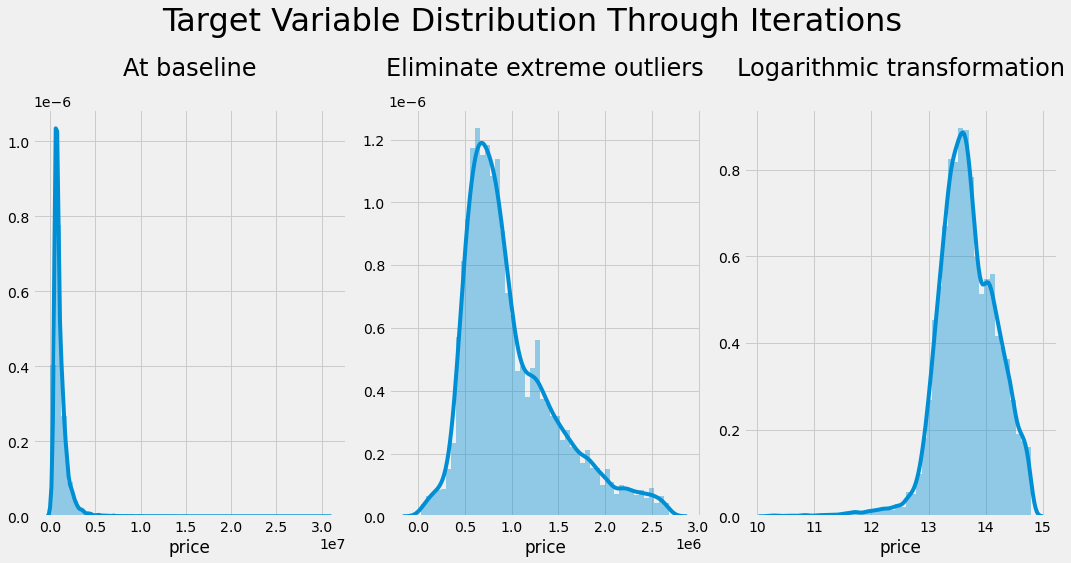

In [1291]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)

og = sns.distplot(df['price'],ax=ax1).set_title('At baseline\n',fontsize=24)
ot = sns.distplot(y,ax=ax2).set_title('Eliminate extreme outliers\n',fontsize=24)
lo = sns.distplot(y_log,ax=ax3).set_title('Logarithmic transformation\n',fontsize=24)

ax1.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")


plt.gcf().set_size_inches(15, 8)
plt.suptitle("Target Variable Distribution Through Iterations",fontsize=32)
fig.tight_layout()
plt.show()

### Checking model with transformed target variable - square root transformation

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     2752.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:30:48   Log-Likelihood:            -1.8000e+05
No. Observations:               28004   AIC:                         3.600e+05
Df Residuals:                   27987   BIC:                         3.602e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.877e+04    333.329    -86.307

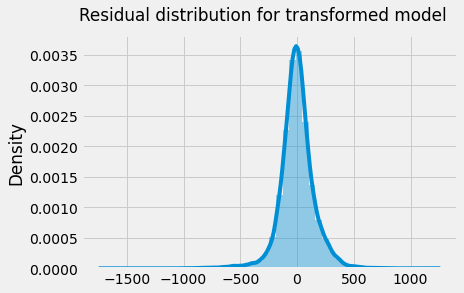

(None,
 Text(0.5, 0.98, 'Residual distribution for transformed model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [1292]:
get_OLS_model('transformed', outlier_data, y_sqrt)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     2158.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:30:48   Log-Likelihood:                -9846.6
No. Observations:               28004   AIC:                         1.973e+04
Df Residuals:                   27987   BIC:                         1.987e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -50.2861      0.766    -65.669

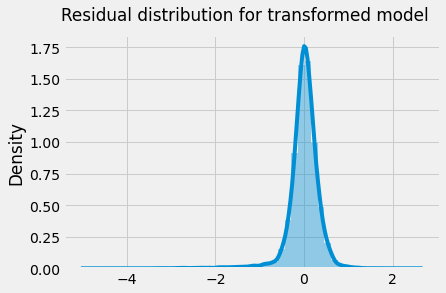

(None,
 Text(0.5, 0.98, 'Residual distribution for transformed model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [1293]:
get_OLS_model('transformed', outlier_data, y_log)

## Checking Root Mean Squared Error

In [1294]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = outlier_data
# Fit a linear regression model
reg = LinearRegression().fit(outlier_data, y_log)

# Predict the target values
y_pred = reg.predict(X)

# Calculate the mean absolute error
rmse = mean_squared_error(y_log, y_pred)

print("Root mean squared error: ", rmse)

Root mean squared error:  0.11828583825459114


## y_log vs y_sqrt

The model with the square root transformation appears to be less skewed and possesses a higher rsquared value, lending the ability of the model to explain more of the data. For these reasons we will use y_sqrt as our dependent variable for now until y_log appears to outweight the benefit of y_sqrt.

Jarque-Beras score is significantly better as well with the y_sqrt variable so I'll go with it for now. 

In [1295]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = outlier_data
# Fit a linear regression model
reg = LinearRegression().fit(X, y_sqrt)

# Predict the target values
y_pred = reg.predict(X)

# Calculate the mean absolute error
rmse = mean_squared_error(y_sqrt, y_pred)

print("Root mean squared error: ", rmse)

Root mean squared error:  22413.247479965237


## Checking distribution of predictor

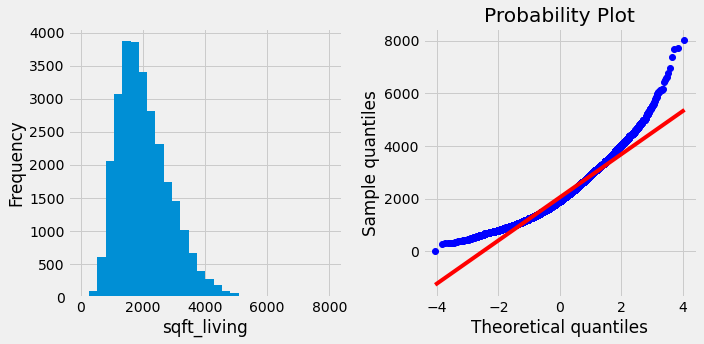

In [1296]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram on the first subplot
axs[0].hist(outlier_data['sqft_living'], bins=30)
axs[0].set_xlabel('sqft_living')
axs[0].set_ylabel('Frequency')

# Plot QQ-plot on the second subplot
stats.probplot(outlier_data['sqft_living'], plot=axs[1])
axs[1].set_xlabel('Theoretical quantiles')
axs[1].set_ylabel('Sample quantiles')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Data is clearly skewed right and follows an exponential pattern similar to price. For this, we will use a logarithmic transformation.

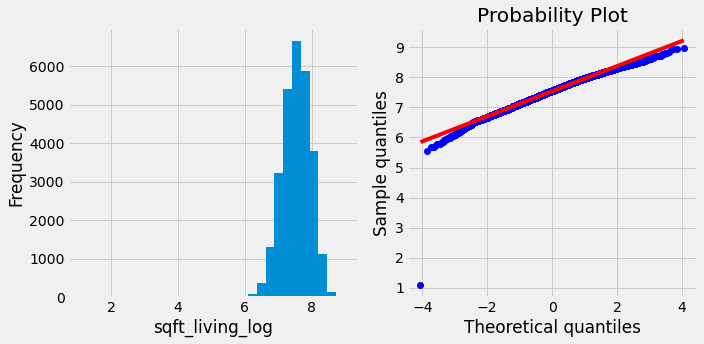

In [1297]:
# log transforming the sqft_living
outlier_data['sqft_living_log'] = np.log(outlier_data['sqft_living'])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram on the first subplot
axs[0].hist(outlier_data['sqft_living_log'], bins=30)
axs[0].set_xlabel('sqft_living_log')
axs[0].set_ylabel('Frequency')

# Plot QQ-plot on the second subplot
stats.probplot(outlier_data['sqft_living_log'], plot=axs[1])
axs[1].set_xlabel('Theoretical quantiles')
axs[1].set_ylabel('Sample quantiles')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Sqft_living now shows an almost perfectly linear qqplot with the logarithmic transformation.

Data appears to be more normally distributed and shows better results on the QQplot.

### Trying out a root transformation to see if there is any improvement. 

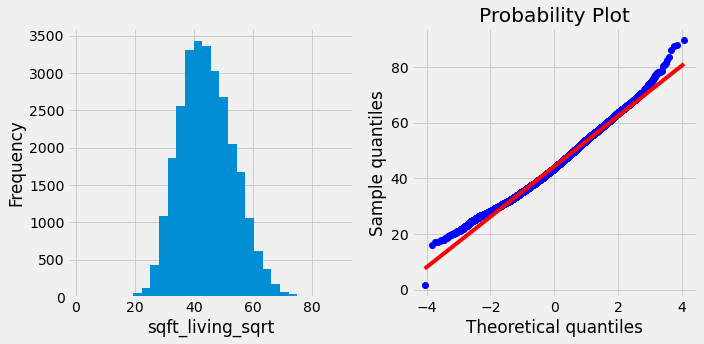

In [1298]:
outlier_data['sqft_living_sqrt'] = outlier_data['sqft_living']**0.5


fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram on the first subplot
axs[0].hist(outlier_data['sqft_living_sqrt'], bins=30)
axs[0].set_xlabel('sqft_living_sqrt')
axs[0].set_ylabel('Frequency')

# Plot QQ-plot on the second subplot
stats.probplot(outlier_data['sqft_living_sqrt'], plot=axs[1])
axs[1].set_xlabel('Theoretical quantiles')
axs[1].set_ylabel('Sample quantiles')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Square root transformation appears to be improving, so we will use it over the log transformation. 

#### With the use of log transformation, we will test the model. 

In [1299]:
outlier_data = outlier_data.drop('sqft_living_sqrt', axis =1)

In [1300]:
outlier_data = outlier_data.drop('sqft_living', axis =1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     2723.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:30:55   Log-Likelihood:            -1.8009e+05
No. Observations:               28004   AIC:                         3.602e+05
Df Residuals:                   27987   BIC:                         3.604e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.938e+04    337.891    -

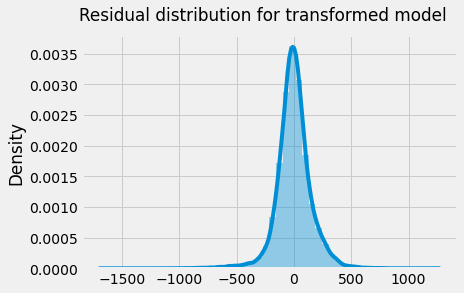

(None,
 Text(0.5, 0.98, 'Residual distribution for transformed model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [1301]:
get_OLS_model('transformed', outlier_data, y_sqrt)

pval > 0.05

- `bedrooms` - will be dropped from the current model
- `yr_renovated` - questionable but will be left in for now

In [1302]:
outlier_data = outlier_data.drop('bedrooms', axis=1)

#### Rerun model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     2904.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:30:57   Log-Likelihood:            -1.8009e+05
No. Observations:               28004   AIC:                         3.602e+05
Df Residuals:                   27988   BIC:                         3.603e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -2.94e+04    337.599    -

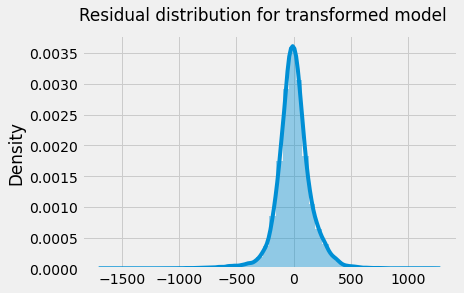

(None,
 Text(0.5, 0.98, 'Residual distribution for transformed model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [1303]:
get_OLS_model('transformed', outlier_data, y_sqrt)

## Observations

- pval > 0.05

`bedrooms` - dropped from the current model

- all variables are statistically significant (pvalue < 0.05)
- Durbin-Watson Score continues to be "fine" but not improve a whole lot.
- Jarque-Bera Score continues to improve but still must come down
- skewness is now an afterthought as its at a very low -0.068
Overall no real improvement of the model happens here, we will try adding in new variables to improve as well as revisit VIFs to likely drop all that were originally at extremely high levels. 


Next steps to improve the model:
1. revisit VIFs to see if any variables(now that outliers are removed and data has been transformed) should now be dropped from the model. 
2. New predictors will be engineered to be added to the model. The next focus will be on the zipcodes in an attempt to narrow down the data with location-dependent price points. Possible data to be looked at are:
- waterfronts 
- views
- school districts: rating, and school taxes
- tax brackets



In [1304]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = outlier_data
# Fit a linear regression model
reg = LinearRegression().fit(X, y_sqrt)

# Predict the target values
y_pred = reg.predict(X)

# Calculate the mean absolute error
rmse = mean_squared_error(y_sqrt, y_pred)

print("Root mean squared error: ", rmse)

Root mean squared error:  22561.487981182498


## Adding in new variables

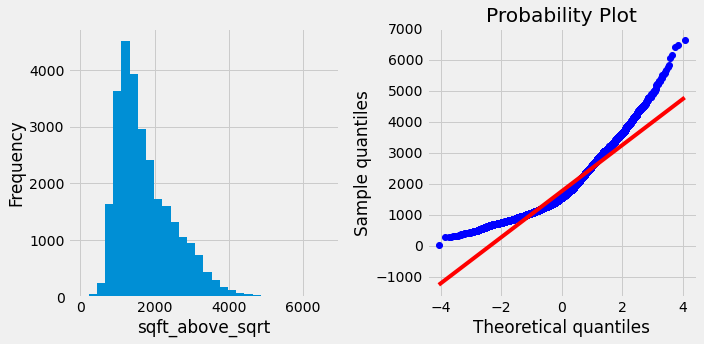

In [1305]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram on the first subplot
axs[0].hist(outlier_data['sqft_above'], bins=30)
axs[0].set_xlabel('sqft_above_sqrt')
axs[0].set_ylabel('Frequency')

# Plot QQ-plot on the second subplot
stats.probplot(outlier_data['sqft_above'], plot=axs[1])
axs[1].set_xlabel('Theoretical quantiles')
axs[1].set_ylabel('Sample quantiles')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### Similar to the sqft_living variable, data appears skewed left and should be transformed before being added to the model. 
- First "try" will be a log transformation, followed again by a root transformation. 

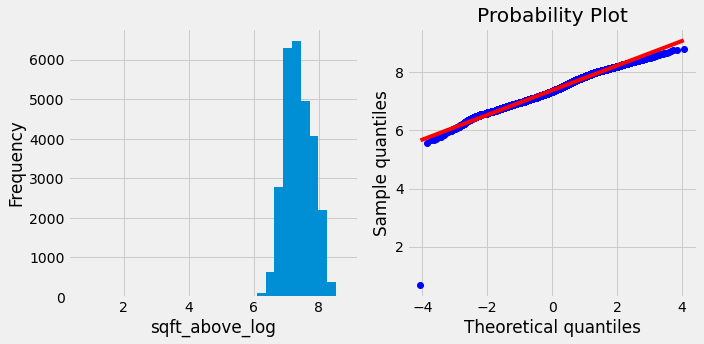

In [1306]:
outlier_data['sqft_above_log'] = np.log(outlier_data['sqft_above'])


fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram on the first subplot
axs[0].hist(outlier_data['sqft_above_log'], bins=30)
axs[0].set_xlabel('sqft_above_log')
axs[0].set_ylabel('Frequency')

# Plot QQ-plot on the second subplot
stats.probplot(outlier_data['sqft_above_log'], plot=axs[1])
axs[1].set_xlabel('Theoretical quantiles')
axs[1].set_ylabel('Sample quantiles')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Similarly as before with the sqft_living variable, the log transformation appears to be normally distributed now. Time to add the variable to the model to see if it improves. 

In [1307]:
outlier_data = outlier_data.drop('sqft_above', axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     2837.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:31:01   Log-Likelihood:            -1.8029e+05
No. Observations:               28004   AIC:                         3.606e+05
Df Residuals:                   27988   BIC:                         3.607e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -3.01e+04    341.655    -

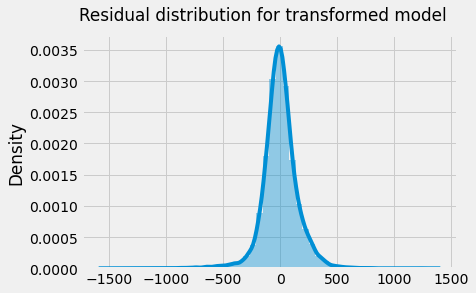

(None,
 Text(0.5, 0.98, 'Residual distribution for transformed model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [1308]:
get_OLS_model('transformed',outlier_data,y_sqrt)

Jarque-Beras score and skew level continue to improve but there is still some work to do. 

In [1309]:
X = outlier_data
# Fit a linear regression model
reg = LinearRegression().fit(X, y_sqrt)

# Predict the target values
y_pred = reg.predict(X)

# Calculate the mean absolute error
rmse = mean_squared_error(y_sqrt, y_pred)

print("Root mean squared error: ", rmse)

Root mean squared error:  22883.33685539246


## Rechecking VIFs

In [1310]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your data into a pandas DataFrame
data = outlier_data

# Get a list of the column names
cols = data.columns

# Create an empty DataFrame to hold the VIF results
vif_data = pd.DataFrame()

# Loop through each column and calculate the VIF
for i in range(len(cols)):
    vif = variance_inflation_factor(data[cols].values, i)
    vif_data = vif_data.append({'Variable': cols[i], 'VIF': vif}, ignore_index=True)

# Print the VIF results
print(vif_data)

           Variable          VIF
0         bathrooms    23.556824
1          sqft_lot     1.148565
2            floors    16.940548
3             grade   127.762701
4     sqft_basement     5.290151
5       sqft_garage     4.471029
6        sqft_patio     2.159277
7          yr_built  7638.549958
8      yr_renovated     1.152604
9               lat  8208.043018
10      day_of_year     5.230064
11       waterfront     1.186285
12             view     1.410443
13  sqft_living_log  3931.937853
14   sqft_above_log  3285.014243


In [1311]:
outlier_data = outlier_data.drop(['sqft_basement','yr_renovated'], axis=1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     3273.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:31:04   Log-Likelihood:            -1.8029e+05
No. Observations:               28004   AIC:                         3.606e+05
Df Residuals:                   27990   BIC:                         3.607e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.004e+04    340.390    -

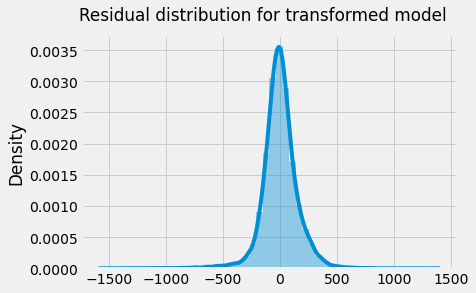

(None,
 Text(0.5, 0.98, 'Residual distribution for transformed model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [1312]:
get_OLS_model('transformed',outlier_data,y_sqrt)

In [1313]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your data into a pandas DataFrame
data = outlier_data

# Get a list of the column names
cols = data.columns

# Create an empty DataFrame to hold the VIF results
vif_data = pd.DataFrame()

# Loop through each column and calculate the VIF
for i in range(len(cols)):
    vif = variance_inflation_factor(data[cols].values, i)
    vif_data = vif_data.append({'Variable': cols[i], 'VIF': vif}, ignore_index=True)

# Print the VIF results
print(vif_data)

           Variable          VIF
0         bathrooms    23.108614
1          sqft_lot     1.148560
2            floors    16.896821
3             grade   127.358100
4       sqft_garage     4.412354
5        sqft_patio     2.147504
6          yr_built  6592.690390
7               lat  7283.735235
8       day_of_year     5.230002
9        waterfront     1.180598
10             view     1.388598
11  sqft_living_log  2098.665800
12   sqft_above_log  1649.971448


In [1319]:
scaledX = (outlier_data - np.mean(outlier_data)) / np.std(outlier_data)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     3273.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:51:52   Log-Likelihood:            -1.8029e+05
No. Observations:               28004   AIC:                         3.606e+05
Df Residuals:                   27990   BIC:                         3.607e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             963.8260      0.904   10

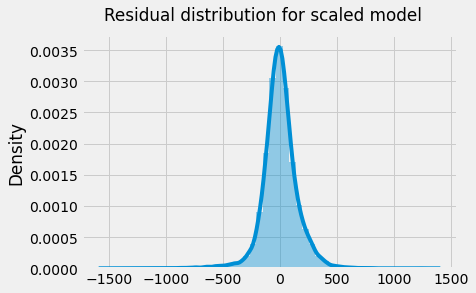

(None,
 Text(0.5, 0.98, 'Residual distribution for scaled model'),
 <AxesSubplot:ylabel='Density'>,
 None)

In [1320]:
get_OLS_model('scaled',scaledX, y_sqrt)